In [1]:
# ----------------------------------------------------------------------------
#
# TITLE - Lab4_Data
# AUTHOR - James
# PROJECT - AST 2050 Lab 4
#
# ----------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Data analysis for Lab 4
'''

__author__ = "James Lane"

In [2]:
### Imports

## Basic
import numpy as np
import sys, os, pdb, importlib

## Plotting
from matplotlib import pyplot as plt

## Project-specific notebook
sys.path.append('../src/')
import ast2050.lab4 as l4

In [3]:
# Matplotlib for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Look at the data

In [4]:
# Read data
data1 = l4.read_tiff('./data/April15/Neon_1.tiff')[515:535,0:350]

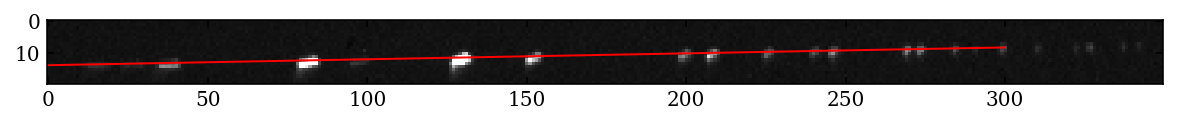

In [10]:
spine_m = -0.0185558078597321
spine_b = 528.7260342144174

fig = plt.figure( figsize=(10,10) )
plt.imshow(data1, vmin=0, vmax=255)
plt.plot( np.array([0,300]), spine_m*np.array([0,300])+spine_b-515, color='Red', linewidth=1.0 )
plt.show()

In [7]:
threshold = 50
where_low_data = np.where( data < threshold )
data[ where_low_data ] = 0

fig = plt.figure( figsize=(10,10) )
plt.imshow(data, vmin=0, vmax=255)
plt.show()

NameError: name 'data' is not defined

# Fit Spine

In [96]:
importlib.reload(l4)

<module 'ast2050.lab4' from '../src/ast2050/lab4.py'>

In [97]:
# Extract the means and the errors
data = l4.read_tiff('./data/April15/Sun_1.tiff')
data = np.sum(data,axis=2)
popt = l4.determine_spectrum_linear_spine( data, threshold=0, slice_array=[515,535,0,350] )
spine_m, spine_b = popt

/Users/JamesLane/Software/Python/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


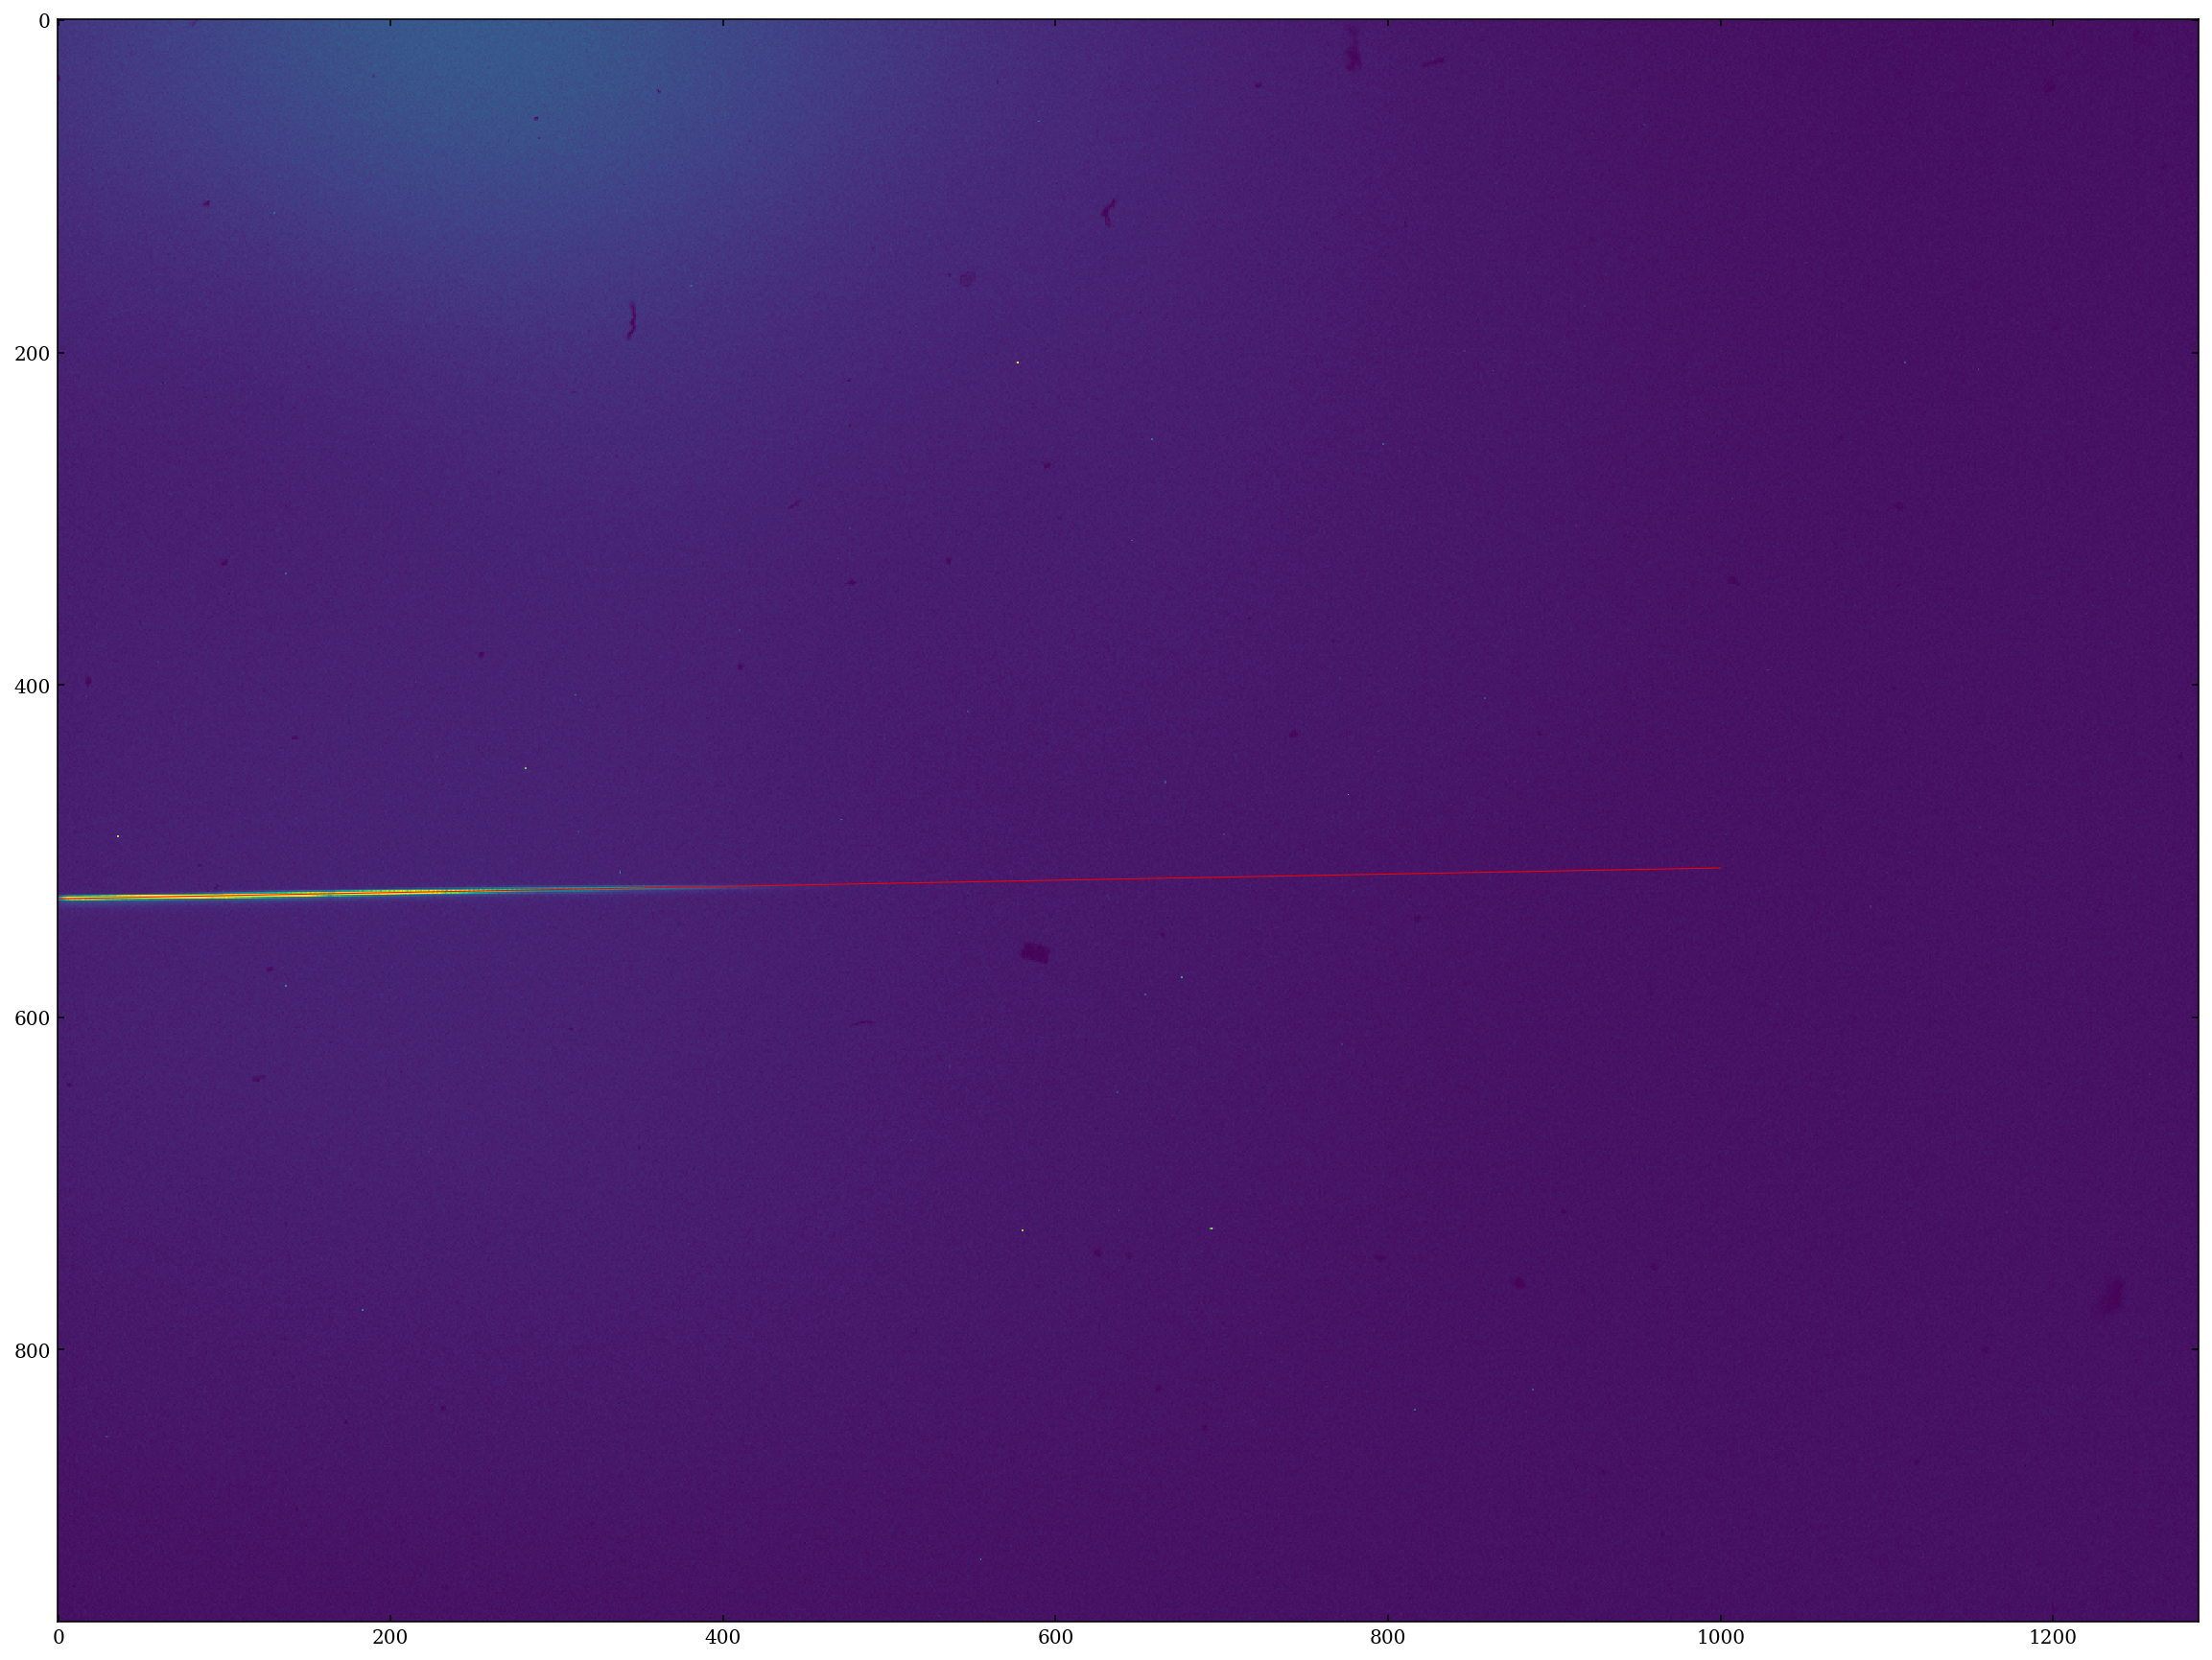

In [99]:
fig = plt.figure( figsize=(20,20) )
plt.imshow(data)
plt.plot( np.array([0,1000]), spine_m*np.array([0,1000])+spine_b, color='Red', linewidth=0.5 )

In [116]:
spine_row_pixels = np.arange( 0, 600, 1.0, dtype='int' )
spine_column_pixels = spine_m*spine_row_pixels + spine_b
spine_column_pixels = spine_column_pixels.astype(int)

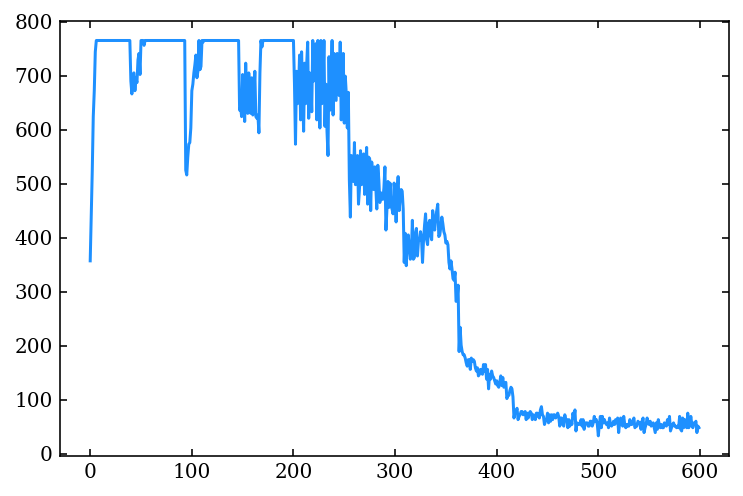

In [117]:
spine_data = np.zeros_like(spine_row_pixels)
for i in range(len(spine_data)):
    spine_data[i] = data[spine_column_pixels[i], spine_row_pixels[i]]
###i

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot( spine_row_pixels, spine_data, color='DodgerBlue' )

plt.show()